In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1D square well

Consider a quantum particle, described by the wave function $\psi(x)$ moving in an external potential $V(x)$.
For simplicity, only consider a one-dimensional real variable $x$.

The wave function of a particle obeys the Schoedinger equation


$$
-\frac{\hbar^2}{2m} \psi''(x)  + V(x)\psi(x) = E\psi(x)\;.
$$

Here $\hbar$ is the Planck's constant, $m$ is the mass of the particle (both are known), and $E$ is the energy of the particle.

Given boundary conditions, the non-zero solution for $\psi(x)$ _only exists for some values of the energies_. Physisists say that the energy of a particle is _quantized_. Mathematicians say that the problem is nothing but the eigenvalue problem of the Sturm-Liouville operator


$$
L = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \;.
$$


Here we consider the so-called square well potential, 

$$
V(x) = %
\begin{cases}
&0, &0 < x < a \\
&\infty, &\text{otherwise.} 
\end{cases}
$$

Define
$$
E = \frac{\hbar^2}{2m} k^2
$$

The Schroedinger equation for $0 < x < a$ becomes

$$
\psi''(x) = -k^2 \psi(x)
$$

with the boundary conditions $\psi(0) = \psi(a) = 0$.

Solutions are

$$\psi_n(x) = \sqrt{\frac{2}{a}} \sin{k_n x}$$


with

$$
k_n a = \pi n\;, \qquad n = 1, 2, \cdots
$$

So that the eigenenergies are

$$
E_n = \frac{\pi^2\hbar^2}{2ma^2} n^2
$$

## Eigenfunctions, numerically

Define a mesh

$$x_j = a \frac{j}{N}, \qquad j=0, \cdots, N
$$

and the mesh function $\psi_j$.

The Schroedinger equation becomes

$$
\psi_{j-1} + \psi_{j+1} - 2\psi_{j} = -k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

where $h=a/N$ is the grid spacing, and the boundary conditions are $\psi_0 = \psi_N = 0$.

Note that the last equation defines the eigenvalue problem in the $N-1$ dimensional space spanned by vectors $(\psi_1, \psi_2, \cdots, \psi_{N-1})^T$. Here the matrix, whose eigenvalues we are looking for, is tridiagonal, and the allowed values of $(k h)^2$ are its eigenvalues.

Write the function that returns the matrix for the eigenvalue problem above.

The numpy function `np.fill_diagonal` may be handy. Also note that to fill sub- and superdiagonals, you may slice the matrix, like so: `a[1:, :]`.

In [9]:
def hamiltonian(npts):
    """Construct the eigenvalue matrix for the discretized 1D Schroedinger equation.
    
    Parameters
    ----------
    npts : int
        The number of nodes in the mesh: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    Returns
    -------
    ham : ndarray, shape(npts-1, npts-1)
        The matrix of the mesh version of the Sturm-Liouville operator.
    """
    ### BEGIN SOLUTION
    ham = np.zeros((npts-1, npts-1))
    np.fill_diagonal(ham, 2.0)
    np.fill_diagonal(ham[1:, :], -1)
    np.fill_diagonal(ham[:, 1:], -1)
    return ham
    ### END SOLUTION

In [34]:
N = 20
ham = hamiltonian(N)
assert ham.shape == (N-1, N-1)

### BEGIN HIDDEN TESTS
from numpy.testing import assert_allclose
N = 10
ham = hamiltonian(N)
assert_allclose(np.diag(ham),
                2, atol=1e-15)
assert_allclose(np.diag(ham, 1),
                -1, atol=1e-15)
assert_allclose(np.diag(ham, -1),
                -1, atol=1e-15)

for s in range(2, 8):
    assert_allclose(np.diag(ham, s),
                    0)
    assert_allclose(np.diag(ham, -s),
                    0)
### END HIDDEN TESTS

### Solve the eigenvalue problem

Write a function which returns the eigenvalues and eigenvectors of the discretized hamiltonian given the number of the mesh points,.

In [73]:
def eigensystem(N):
    """Construct the Hamiltonian on a mesh and compute its eigenvalues and eigenvectors.
    
    Return eigenvalues in the sorted order.
    
    Parameters
    ----------
    N : int
        The number of nodes in the mesh: $x_j = a*j /N$, with $j=0, ..., N$.
        
    Returns
    -------
    vals : ndarray, shape(N-1,)
        Eigenvalues, in the ascending order.
        
    vects : ndarray, shape(N-1, N-1)
        Eigenvectors arranged in columns: `vect[:, j]` is the 
        normalized eigenvector corresponding to `vals[j]`.
    """
    ### BEGIN SOLUTION
    vals, wavefunctions = np.linalg.eigh(hamiltonian(N))

    # eigvals are not necessarily sorted, so sort them manually
    # XXX: should also sort the wavefunctions
    idx = np.argsort(vals)
    vals = vals[idx]
    
    return vals, wavefunctions
    ### END SOLUTION

In [75]:
N = 10
ham = hamiltonian(10)
vals, vects = eigensystem(10)

assert (vals[1:] >= vals[:-1]).all()

for j in range(vals.shape[0]):
    assert_allclose(ham @ vects[:, j],
                    vals[j] * vects[:, j], atol=1e-10)


### Long-wavelength limit of the FD problem

We expect that in the limit of $N\to\infty$ solutions of the discretized system tends to the solution of the continuous problem. 

Plot the spectrum of the FD problem for several values of $N$. Note that the spectrum is bounded, i.e. we can only hope that low-lying eigenstates match: for large enough $N$, several first eigenstates of the FD problem are close to the corresponding eigenstates of the continuous problem. (See e.g. A.A. Samarski and A.V. Gulin, Sec 1.4.4 for details)

In [ ]:
# Plot the spectrum of the FD problem for several values of N. 
# Plot the spectrum of the continuous problem on the same plot.


Make the function in the cell below return a value of $N$ such that the first 10 eigenvalues of the FD problem and the continuous problem match within the relative tolerance of $10^{-3}$.

In [111]:
def get_large_N():
    ### BEGIN SOLUTION
    NN = 500
    return NN 
    ### END SOLUTION

In [112]:
NN = get_large_N()

vals, _ = eigensystem(NN)

# the rest of this cell is a test which compares first 10 eigenvalues

### BEGIN HIDDEN TESTS

# Experimentally, NN=500 is enough
continuous = np.pi**2 * np.arange(1, NN)**2 / NN**2
assert_allclose(vals[:10],
                continuous[:10], rtol=1e-3)
### END HIDDEN TESTS

### Wave functions

Plot the wave functions (i.e. eigenvectors) for several lowest eigenstates. Compare to expected form. How many zeros does the eigenfunction number $k$ have?

In [113]:
# plot the wave functions here


# Perturbation

Consider now the modified potential: add to the square well potential the additional term 

$$
V(x) = -\frac{\hbar^2}{2m}\, \gamma\, x(x-a)
$$

for $0 < x < a$, where $\gamma$ is a constant.

An analytic solution is no longer possible, but the numeric solution is a straightforward extension of what we did in the previous section.

## Numeric solution

Again, define a grid function $\psi_j$. The Schroedinger equation then becomes

$$
-\left( \psi_{j-1} + \psi_{j+1} - 2\psi_{j} \right) - \gamma h^2 x_j (x_j - a) \psi_j = k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

so that the diagonal elements of the Hamiltonian matrix are no longer constants.

Construct the hamiltonian matrix, solve for the eigenvalues and plot the ground state wave functions for a range of $\gamma$. Discuss the structure of the wave function for $\gamma > 500$.

In [11]:
def hamiltonian_perturbed(gamma, npts):
    """Construct the eigenvalue matrix for the discretized 1D Schroedinger equation.
    
    Parameters
    ----------
    gamma : float
        The extra potential is $gamma * x * (x-1)$
    npts : int
        The number of nodes in the mesh: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    Returns
    -------
    ham : ndarray, shape(npts-1, npts-1)
        The matrix of the mesh version of the Sturm-Liouville operator.
    """
    ### BEGIN SOLUTION
    ham = np.zeros((npts-1, npts-1))
    
    x = np.arange(1, npts) / npts
    v = x * (x - 1) / npts**2
    
    np.fill_diagonal(ham, 2.0 - gamma*v)
    np.fill_diagonal(ham[1:, :], -1)
    np.fill_diagonal(ham[:, 1:], -1)
    return ham
    ### END SOLUTION

In [37]:
gamma, N = 590, 11
h = hamiltonian_perturbed(gamma, N)

assert h.shape == (N-1, N-1)

### BEGIN HIDDEN TESTS
x = np.arange(1, N) / N
v = x * (x - 1) / N**2

from numpy.testing import assert_allclose
assert_allclose(np.diagonal(h),
                2.0 - gamma*v, atol=1e-15)

assert_allclose(np.diagonal(h, 1), -1)
assert_allclose(np.diagonal(h, -1), -1)

# check the rest is zeros
np.fill_diagonal(h, 0)
np.fill_diagonal(h[1:], 0)
np.fill_diagonal(h[:, 1:], 0)
assert_allclose(h, 0)
### END HIDDEN TESTS

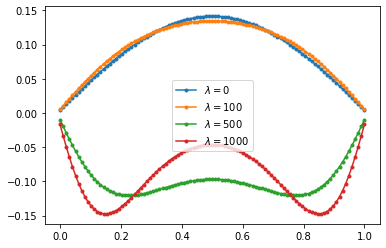

In [38]:
### BEGIN SOLUTION
N = 100

for lam in [0, 100, 500, 1000]:
    ham = hamiltonian_perturbed(lam, N)
    vals, psi = np.linalg.eigh(ham)

    grid = np.linspace(0, 1, N-1)
    plt.plot(grid, psi[:, 0], '.-', label=r'$\lambda = %s$' % lam)
plt.legend(loc="best")
### END SOLUTION

Bonus: discuss the structure of the spectrum at large $\gamma$.